In [54]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
from operator import add

class CGR():
    K = 0
    c = None
    h = ""
    Data = ""
    def read_fasta(self,loc):
        f = open(loc)
        s1 = f.read()
        data = "".join(s1.split("\n")[1:])
        head = "".join(s1.split("\n")[0:1])
        return data,head
    
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(self.Data)-(k-1)):
            d[sequence[i:i+k]] +=1
        d.pop("N",None)
        return d

    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(self.Data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx +=  maxx/2
                elif char == "C":
                    posy += maxy/2
                elif char == "G":
                    posx += maxx/2
                    posy += maxy/2
                maxx /= 2
                maxy /= 2

            chaos[int(posy-1)][int(posx-1)] = value
            maxx = array_size
            maxy = array_size
            posx = 1
            posy = 1
        return chaos

    def load_fasta(self,loc,k):
        data,head = self.read_fasta(loc)
        self.Data = data
        f4 = self.count_kmers(data, k)
        f4_prob = self.probabilities(f4, k)
        chaos_k4 = self.chaos_game_representation(f4_prob, k)
        self.c = chaos_k4
        self.h = head
        return chaos_k4
    
    def show(self):
        pylab.figure(figsize=(12,12))
        pylab.title('CGR of '+str(self.K)+'-mers for '+self.h[2:])
        pylab.imshow(self.c, cmap=cm.gray_r)
        pylab.show()

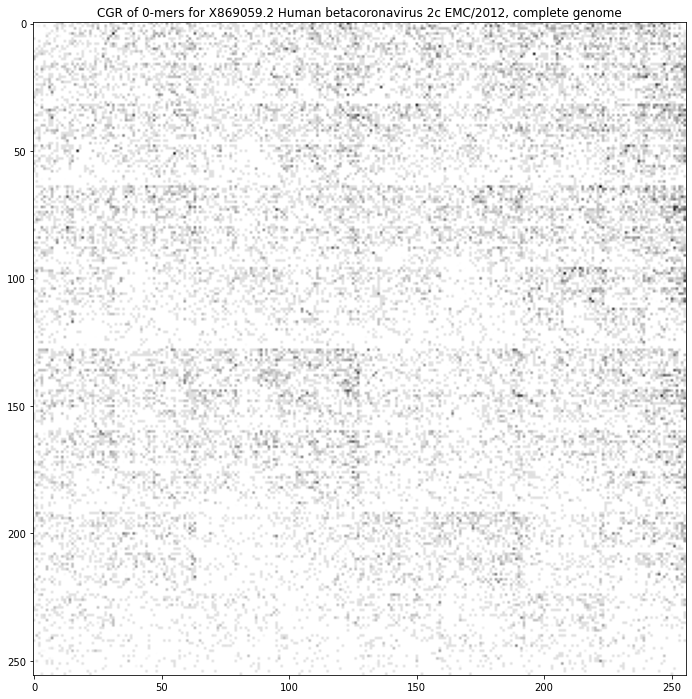

In [46]:
A = CGR()
cg = A.load_fasta("genomic.fasta",8)
A.show()

In [99]:
B = CGR()
cg = B.load_fasta("seq_1.fasta",7)
C = CGR()
cg_1 = C.load_fasta("seq_2.fasta",7)

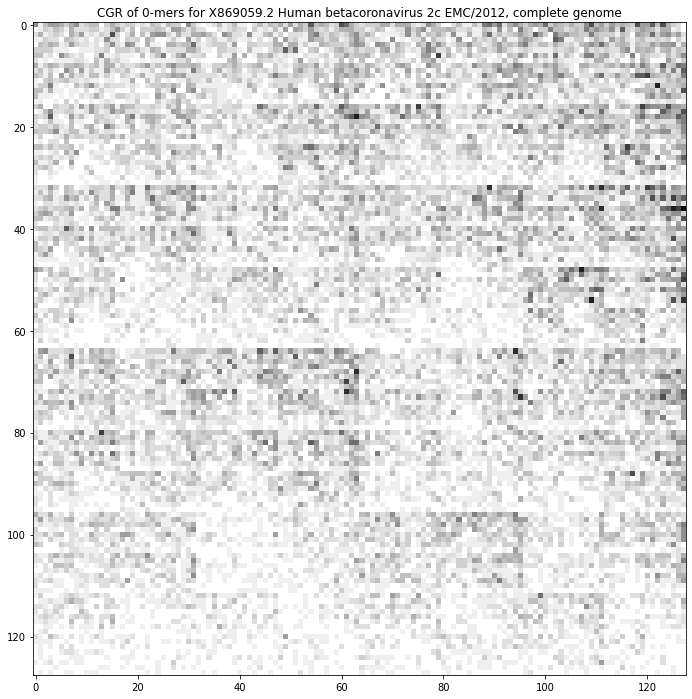

In [102]:
B.show()

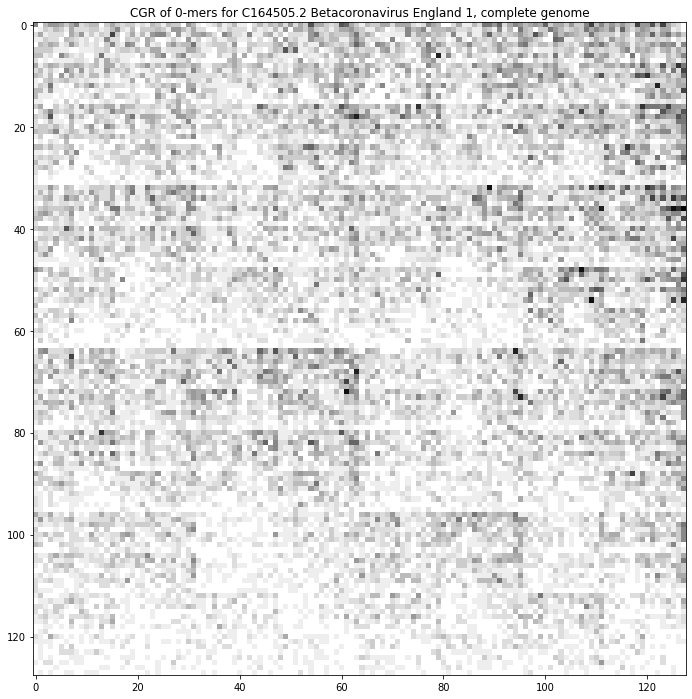

In [103]:
C.show()

In [100]:
a = max(cg[0])
b = max(cg[1])
CG = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg[0],cg[1]))
a = max(cg_1[0])
b = max(cg_1[1])
CG_1 = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg_1[0],cg_1[1]))

In [101]:
from scipy.stats import spearmanr
corr, _ = spearmanr(CG,CG_1)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.985


In [110]:
f = open("seq_1.fasta")
s1 = f.read()
data_1 = "".join(s1.split("\n")[1:])
f = open("seq_2.fasta")
s1 = f.read()
data_2 = "".join(s1.split("\n")[1:])

In [114]:
sum=0
for i in range(len(data_2)):
    if data_1[i]==data_2[i]:
        sum+=1
sum/=len(data_1)
print(sum)

0.9877817988645041


In [130]:
import numpy as np

In [131]:
t

array([[2.32519515e-04, 0.00000000e+00, 1.32868294e-04, ...,
        9.96512207e-05, 6.64341472e-05, 0.00000000e+00],
       [0.00000000e+00, 3.32170736e-05, 9.96512207e-05, ...,
        3.32170736e-05, 6.64341472e-05, 0.00000000e+00],
       [6.64341472e-05, 1.66085368e-04, 3.32170736e-05, ...,
        1.32868294e-04, 1.99302441e-04, 9.96512207e-05],
       ...,
       [3.32170736e-05, 0.00000000e+00, 6.64341472e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.32170736e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.32170736e-05, 0.00000000e+00, ...,
        3.32170736e-05, 0.00000000e+00, 0.00000000e+00]])

<Figure size 864x864 with 0 Axes>

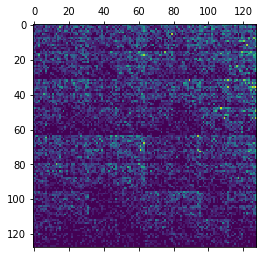

In [132]:
plt.figure(figsize=(12,12))
t = np.array(cg_1)
plt.matshow(t)
plt.show()